## Analysis and prediction of labour turnover

- **1. Objective:** To analyse employee data in order to identify patterns that affect employee turnover, predict which employee profiles are most likely to leave and provide strategies to improve talent retention.
- **2. Project description:**
  - **Data collection:** The dataset used comes from Kaggle and is created by IBM data scientists (https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset).
  - **Data preparation:** Columns that will not add value to the analysis are removed, columns are renamed, and duplicate values are eliminated.
  - **Creation of graphs and data extraction:** we formulate the different graphs and correlation maps that will allow us to analyse the relationships between the different variables.
- **3. Conclusions of the analysis carried out:**
  - **Definition of the factors that are associated with employee turnover.**
  - **Identification of patterns.**
  - **Recommendations for improving talent retention.**

# We load the data

In [1]:
import pandas as pd
df = pd.read_csv("dataIBM.csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Review of data

## - Number of rows and columns

In [2]:
df.shape

(1470, 35)

## - Data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## - Check for unique values in the lead column

In [4]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# Data cleaning

## - Null values

Identify if there are null values

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Data exploration (EDA)

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


We add a small graph to show the distribution of labour turnover

<AxesSubplot:xlabel='Attrition', ylabel='count'>

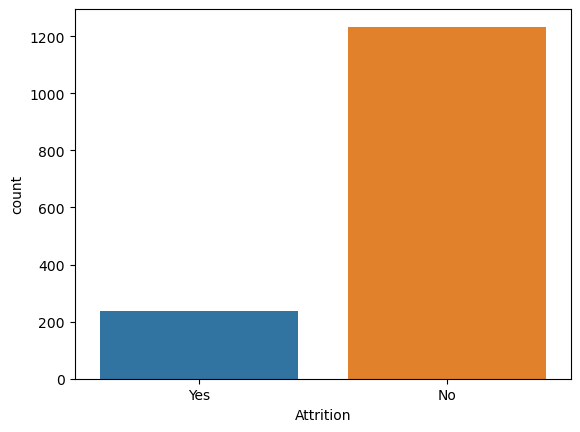

In [7]:
import seaborn as sns
sns.countplot(data=df, x='Attrition')

## - Statistical summary

In [8]:
print(df.describe)

<bound method NDFrame.describe of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Educati

In [9]:
print(df.describe(include='object'))

       Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054  


## - Visualisation of the distribution of numerical variables

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

#### · Age distribution.

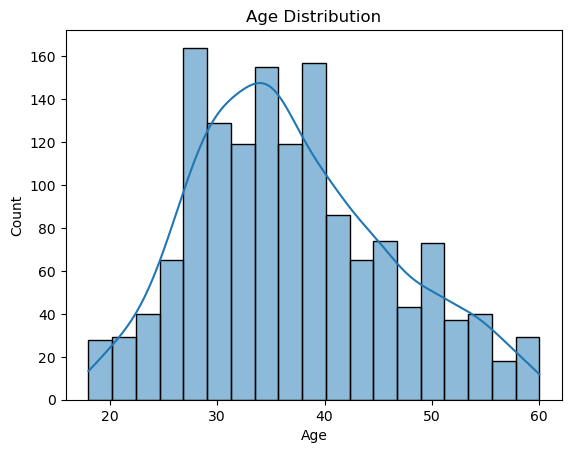

In [11]:
sns.histplot(data=df, x='Age', kde=True)
plt.title("Age Distribution")
plt.show()

#### · Salary distribution.

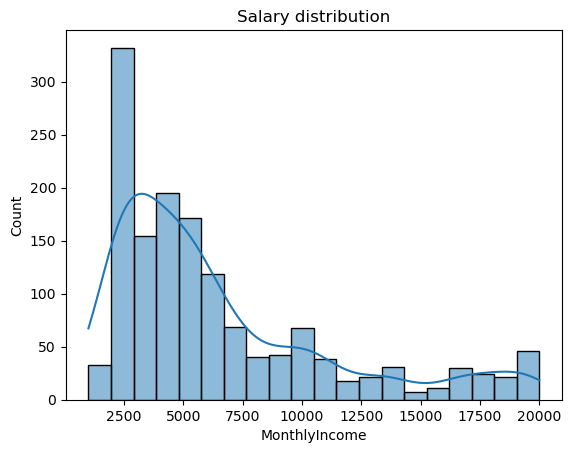

In [24]:
sns.histplot(data=df, x='MonthlyIncome', kde=True)
plt.title("Salary distribution")
plt.show()

#### · Distribution by level of education

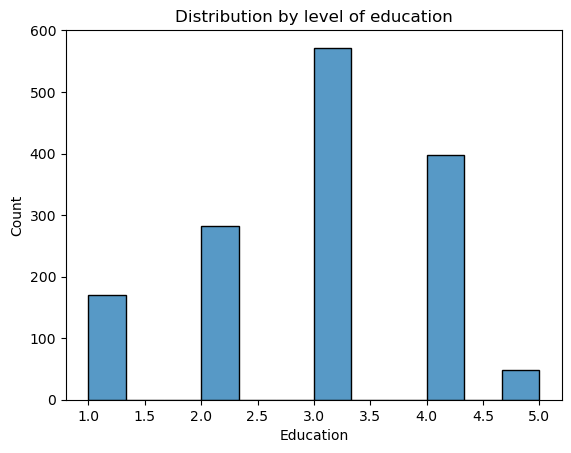

In [25]:
sns.histplot(data=df, x='Education')
plt.title("Distribution by level of education")
plt.show()

#### · Heat map for identifying correlations

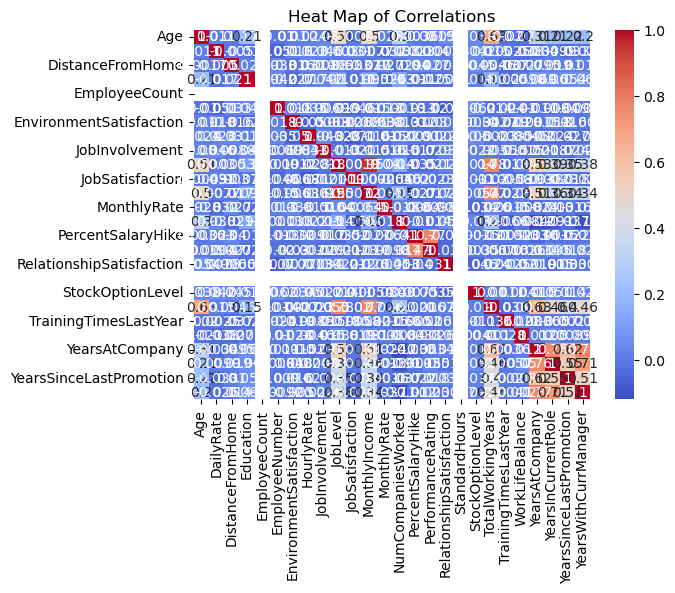

In [26]:
correlaciones = df.corr()
sns.heatmap(correlaciones, annot=True, cmap="coolwarm")
plt.title("Heat Map of Correlations")
plt.show()

We adjust the size to better see the results and create a mask to see only the values above 0.5

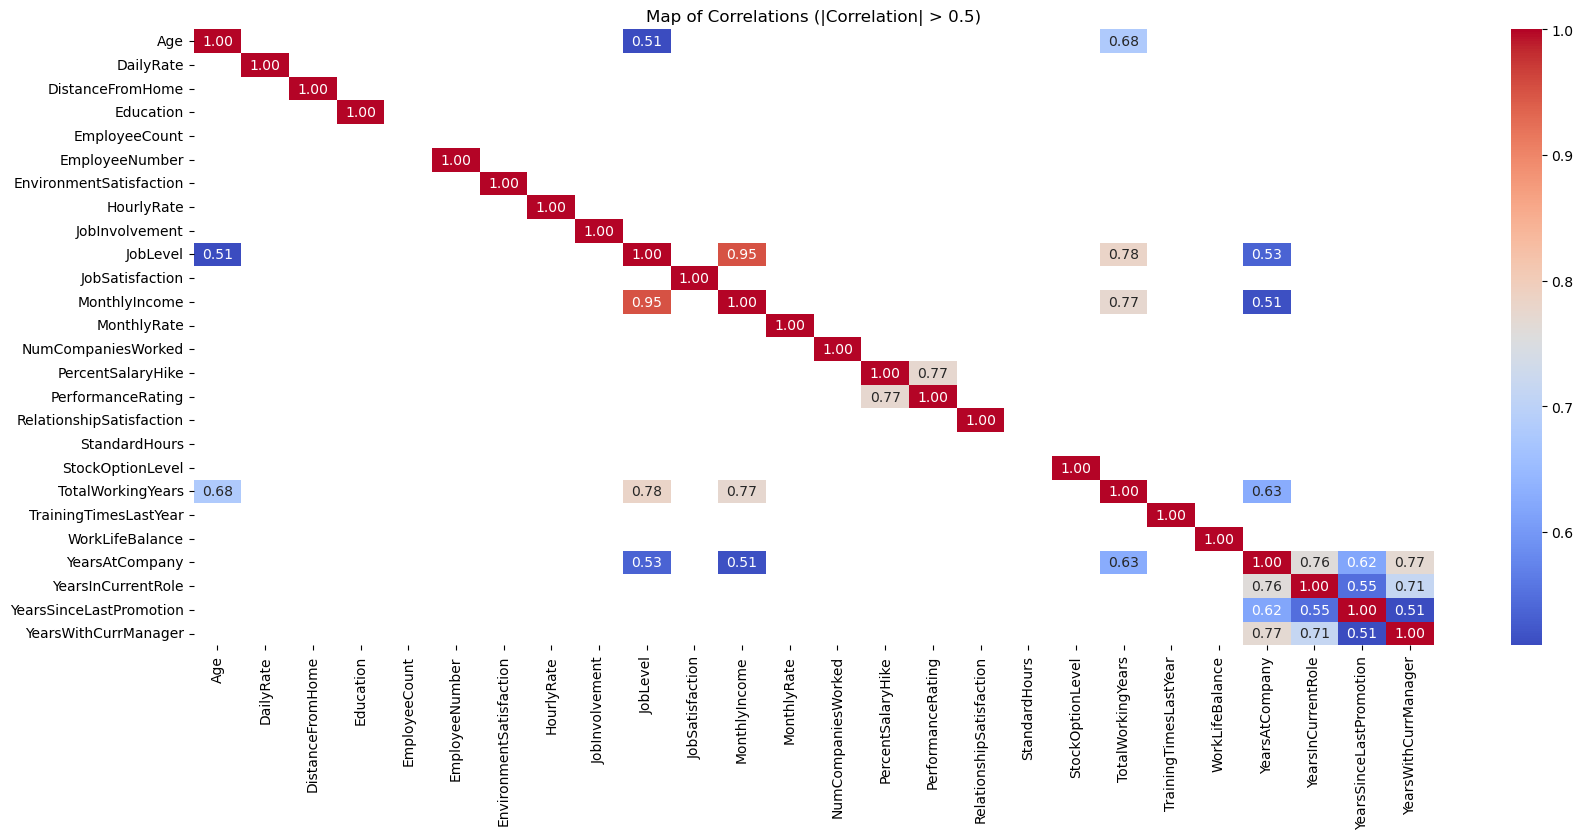

In [27]:
threshold = 0.5
mascara = abs(correlaciones) < threshold

plt.figure(figsize=(20, 8))
sns.heatmap(correlaciones, annot=True, cmap="coolwarm", fmt=".2f", mask=mascara)
plt.title("Map of Correlations (|Correlation| > 0.5)")
plt.show()

#### · Boxplot to see the distribution of revenues according to turnover.

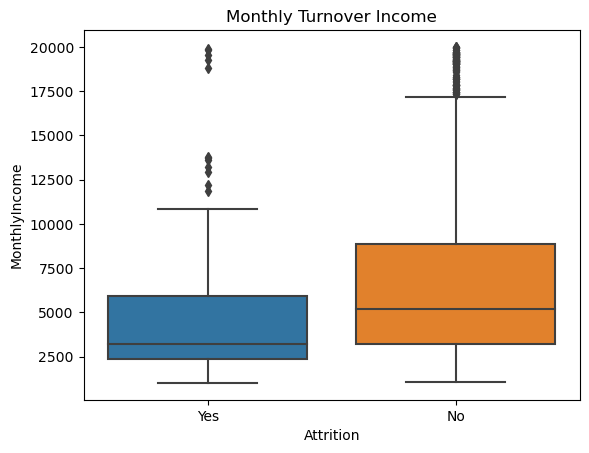

In [28]:
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title("Monthly Turnover Income")
plt.show()

#### · Graph to see the distribution of turnover as a function of overtime hours

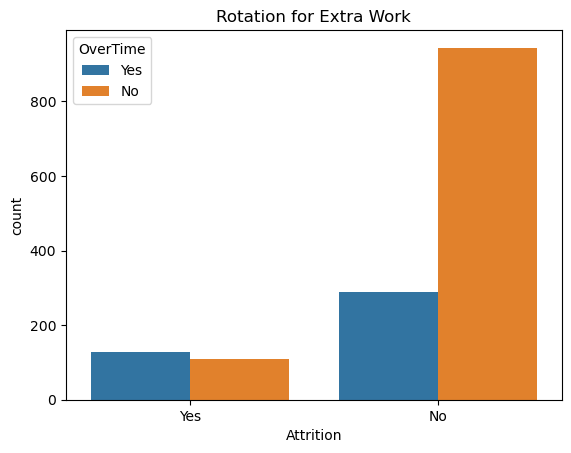

In [29]:
sns.countplot(data=df, x='Attrition', hue='OverTime')
plt.title("Rotation for Extra Work")
plt.show()

#### · Graph and boxplot to see the distribution of job satisfaction with respect to turnover.

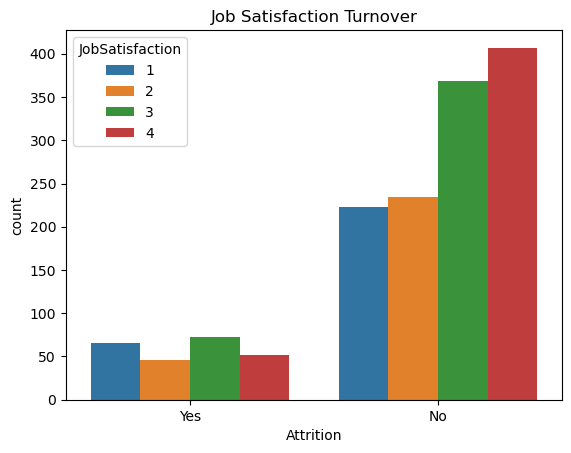

In [30]:
sns.countplot(data=df, x='Attrition', hue='JobSatisfaction')
plt.title("Job Satisfaction Turnover")
plt.show()

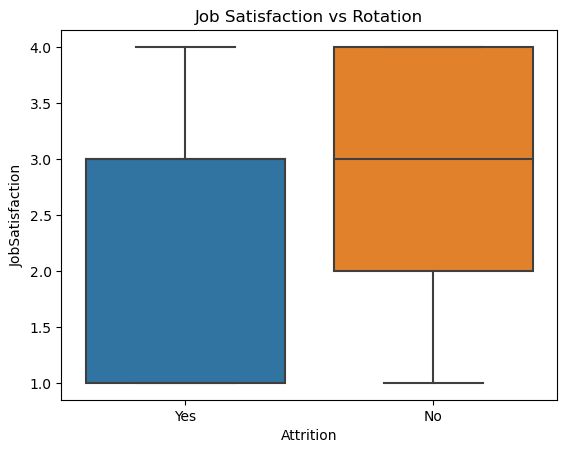

In [32]:
sns.boxplot(data=df, x='Attrition', y='JobSatisfaction')
plt.title("Job Satisfaction vs Rotation")
plt.show()

#### · Graph to see the distribution of conciliation.

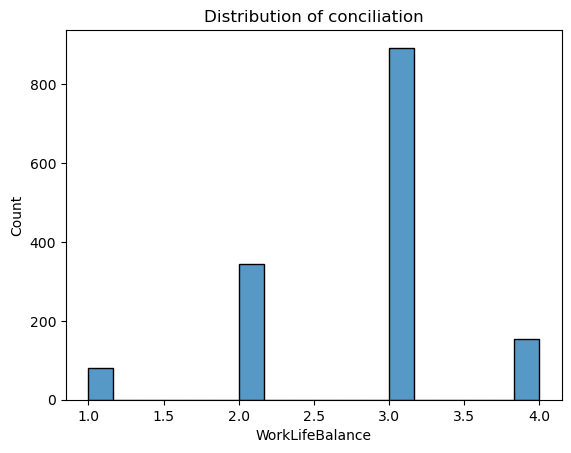

In [33]:
sns.histplot(data=df, x='WorkLifeBalance')
plt.title("Distribution of conciliation")
plt.show()

#### · Graph to see the distribution of job satisfaction.

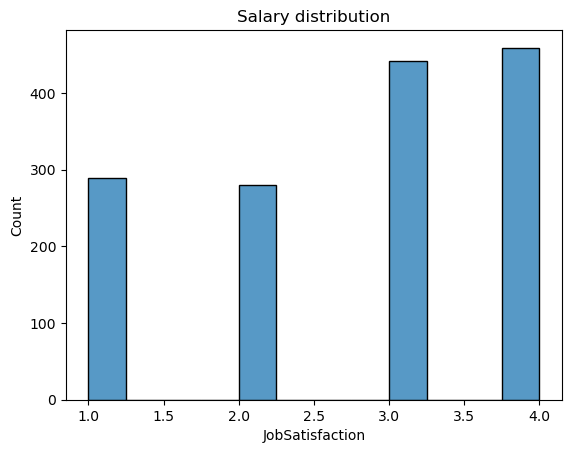

In [34]:
sns.histplot(data=df, x='JobSatisfaction')
plt.title("Salary distribution")
plt.show()

In [22]:
df.groupby('Attrition')['JobSatisfaction'].mean()

Attrition
No     2.778589
Yes    2.468354
Name: JobSatisfaction, dtype: float64

#### · Rotation rate

In [36]:
proportions = df['Attrition'].value_counts(normalize=True) * 100
print(proportions)

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64


# Conclusions of the analysis
## 1. The factors associated with employee turnover are as follows:
- **Low wages contribute to turnover:** as they have a higher turnover rate compared to higher salaries.
- **Seniority in the company:** staff turnover is higher among employees with fewer years in the company.
- **Working hours:** employees who report not doing extras are more likely to leave the company.
- **Job satisfaction:** job satisfaction is lower among employees who resign. This indicates that the way the work environment is perceived influences the decision to leave or not.
- **Work/life balance:** the highest turnover rates are found among profiles with a lower score on this variable, which is evidence of the importance of a good work-life balance.
## 2. Identified patterns of staff turnover:
- In the heat map it can be identified that **monthly income, years in the company and job satisfaction** are related to employee retention.
- Employees who do not work overtime have a lower turnover rate, so **workloads and flexibility** could be key factors in preventing talent drain.
- The turnover rate in the company is **16.12%**, indicating that although a large percentage of employees remain with the company, there are a large number of people who decide to resign.
## 3. Recommendations for improving talent retention:
- **Review of wage policies:** implement certain wage adjustment strategies targeted at lower-income employees.
- **Work flexibility:** identify and reduce excessive workloads and offer flexible working hours or teleworking.
- **Incentives and additional benefits:** consider offering performance bonuses, additional days off or programmes that can improve work-life balance.
- **Improving the working environment:** implement job satisfaction surveys to identify and address problems that may affect staff motivation.

All these findings can serve as a starting point for developing strategies to reduce turnover and the costs it causes and improve talent retention in the company.